In [1]:
from ete3 import PhyloTree
from ete3 import Tree,TreeStyle,NodeStyle
import pandas as pd
import os
import re
import numpy as np
import string
from ete3 import Tree, faces, TreeStyle, NodeStyle
from ete3 import ClusterTree, RectFace, AttrFace, ProfileFace, TextFace, BarChartFace,StackedBarFace
from ete3.treeview.faces import add_face_to_node
import colorsys
import random
from pathlib import Path

In [2]:
# Genreate a color randomly
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

In [3]:
taxonomy = pd.read_table("/scale03/fs0/gpfs0/research/dsi-find/mlk442/correlation_table/taxonomy.txt", sep = "\t")
taxonomy.head(10)

,MaterialLabel,MGx Selected,Genus,species,ID
0,DA002F0001,NO,Streptomyces,albus,NaN
1,DA003H0001,NO,Streptomyces,anulatus,NaN
2,DA004A0004,YES,Streptomyces,sp,rpoB
3,DA004C0003,NO,Streptomyces,sp,NaN
4,DA004E0001,YES,Amycolatopsis,japonica,rpoB
5,DA006D0002,NO,Streptomyces,sp,NaN
6,DA006D0003,NO,Streptomyces,sp,NaN
7,DA007H0001,NO,Streptomyces,sp,NaN
8,DA007L0001,NO,Klenkia,brasiliensis,NaN
9,DA007M0001,NO,Streptomyces,sp,NaN


In [4]:
strainName = taxonomy.MaterialLabel+ " "+taxonomy.Genus +" "+ taxonomy.species
GenusSpecies = taxonomy.Genus
dict_strain = dict(zip(taxonomy.MaterialLabel.tolist(), strainName))
dict_strain["Escherichia"] = "Escherichia Escherichia coli"
dict_strain

{'DA002F0001': 'DA002F0001 Streptomyces albus',
 'DA003H0001': 'DA003H0001 Streptomyces anulatus',
 'DA004A0004': 'DA004A0004 Streptomyces sp',
 'DA004C0003': 'DA004C0003 Streptomyces sp',
 'DA004E0001': 'DA004E0001 Amycolatopsis japonica',
 'DA006D0002': 'DA006D0002 Streptomyces sp',
 'DA006D0003': 'DA006D0003 Streptomyces sp',
 'DA007H0001': 'DA007H0001 Streptomyces sp',
 'DA007L0001': 'DA007L0001 Klenkia brasiliensis',
 'DA007M0001': 'DA007M0001 Streptomyces sp',
 'DA007N0001': 'DA007N0001 Streptomyces sp',
 'DA007R0002': 'DA007R0002 Streptomyces sp',
 'DA008E0001': 'DA008E0001 Streptomyces sp',
 'DA008K0001': 'DA008K0001 Streptomyces sp',
 'DA008P0001': 'DA008P0001 Streptomyces sp',
 'DA009E0001': 'DA009E0001 Streptomyces sp',
 'DA009E0002': 'DA009E0002 Streptomyces sp',
 'DA009M0001': 'DA009M0001 Streptomyces sp',
 'DA009R0001': 'DA009R0001 Streptomyces flavogriseus',
 'DA011D0001': 'DA011D0001 Streptomyces fimicarius',
 'DA011D0002': 'DA011D0002 Streptomyces sp',
 'DA011E0001': '

In [5]:
#Creat color map for each 
GenusSpeciesUniq = GenusSpecies.unique().tolist()
dict_color= {} 
for i in range(len(GenusSpeciesUniq)):
    dict_color[GenusSpeciesUniq[i]] = randomcolor()    
dict_color["Escherichia"] = randomcolor()    
len(set(dict_color.values())) == len(dict_color.keys())
#dict_color

True

In [6]:
# Read the tree
with open('/home/mlk442/FIND/mlk442/phylogenetic/16s_tree_ecoli.txt') as f:
    tree = f.readline()
t = PhyloTree(tree)
#print (t)
#tree

In [7]:
strains = list()
dict_nodeName = dict()
#dict_nodeColor = dict()
for leaf in t.iter_leaves():
    info = leaf.name.split("_")
    if (len(info) > 1):
        strain = info[1]
    else:
        strain = info[0]
        #print (leaf.name)
    if strain in dict_strain.keys():
        dict_nodeName[leaf.name] = dict_strain[strain]  
        info = dict_strain[strain].split( )[1] 
        #dict_nodeColor[leaf.name] = dict_color[info]
    strains.append(strain)
dict_nodeName["Escherichia"]

'Escherichia Escherichia coli'

In [8]:
for key in dict_nodeName.keys():
    tree = tree.replace(key,dict_nodeName[key])

In [9]:
t = PhyloTree(tree)
dict_nodeColor = dict()
for leaf in t.iter_leaves():
    Genus_type =leaf.name.split( )[1]
    dict_nodeColor[leaf.name] = dict_color[Genus_type]
    
set(list(dict_nodeColor.values()))
#print(t)
dict_nodeColor['Escherichia Escherichia coli']

'#1F1E4C'

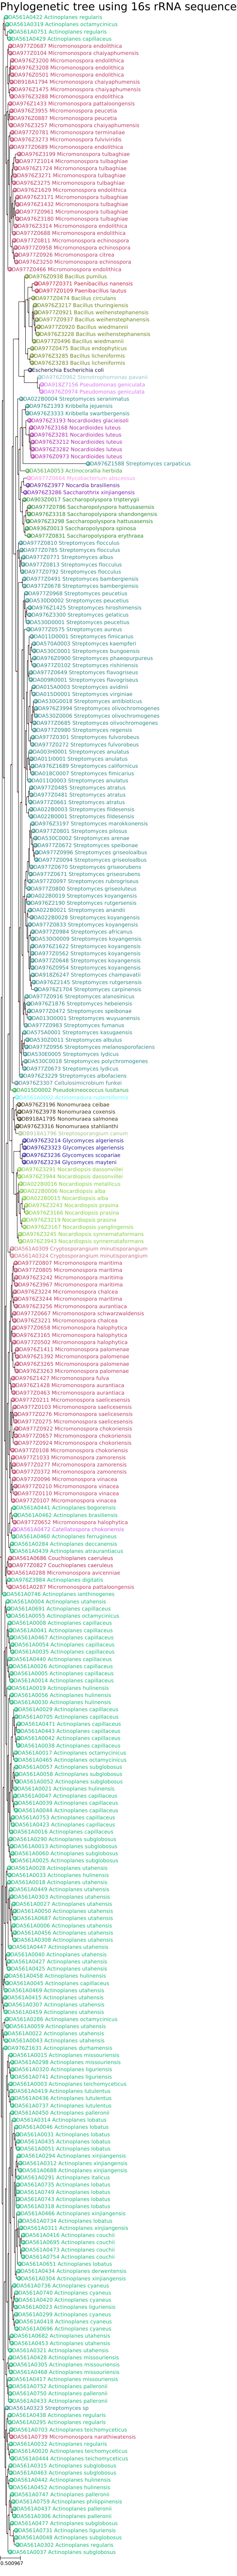

In [10]:
ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True
#ts.show_branch_support = False 
#t.populate(10, random_dist=True)
ts.branch_vertical_margin = 1
ts.title.add_face(TextFace("Phylogenetic tree using 16s rRNA sequence", fsize=20), column=0)

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):   
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # We can also create faces on the fly
        #newName = dict_nodeName.get(node.name, node.name)
        color = dict_nodeColor.get(node.name, node.name)
        #newNameFace = faces.TextFace(newName,fgcolor =color  )
        #faces.add_face_to_node(newNameFace, node, column=1, aligned=True)
        name_face = TextFace(node.name, fgcolor=color, fsize=10)
        node.add_face(name_face, column=1, position='branch-right')
        # Sets the style of leaf nodes
        node.img_style["size"] = 10
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = color
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 2
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

ts.layout_fn = mylayout

t.img_style["size"] = 30
t.img_style["fgcolor"] = "black"
#16sTreeWithEcoli
#t.render(file_name="16sTreeWithEcoli.pdf", w=600, tree_style=ts)
t.render(file_name="%%inline", w=600, tree_style=ts)